In [1]:
import sys
import numpy as np
import dill
import matplotlib.pyplot as plt
%matplotlib inline

import coremagmodels as cm

sys.path.append('../')
import coreflows as cf
sf = cf.advect.SteadyFlow()
wv = cf.advect.Waves()

## Load Data to Analyze

In [2]:
magmod = cm.models.Chaos6()

In [3]:
# Import and create analytic waves 
wave_fit = dill.load(open('../coreflows/data/wavefits012.p','rb'))
c012 = wave_fit['c012']
f012 = wave_fit['f012']

In [7]:
syn_data = dill.load(open('./data_4_waves.m','rb'))
locals().update(syn_data)

# Analyze the Data

In [9]:
plot_figures = True

## Period-Wavenumber Transformation

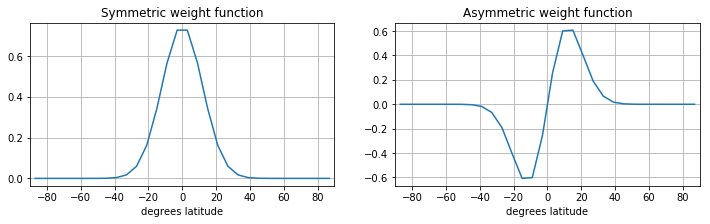

In [10]:
# Weight Functions
th_eq = 90
sigmath = 12
lat = th-90
weights_s = wv.hermite_fun(lat/sigmath, 0)
weights_a = wv.hermite_fun(lat/sigmath, 1)

if plot_figures:
    plt.figure(figsize=(12,3))
    plt.subplot(121)
    cf.plot.vs_latitude(th, weights_s, title='Symmetric weight function', newfig=False)
    plt.subplot(122)
    cf.plot.vs_latitude(th, weights_a, title='Asymmetric weight function', newfig=False)


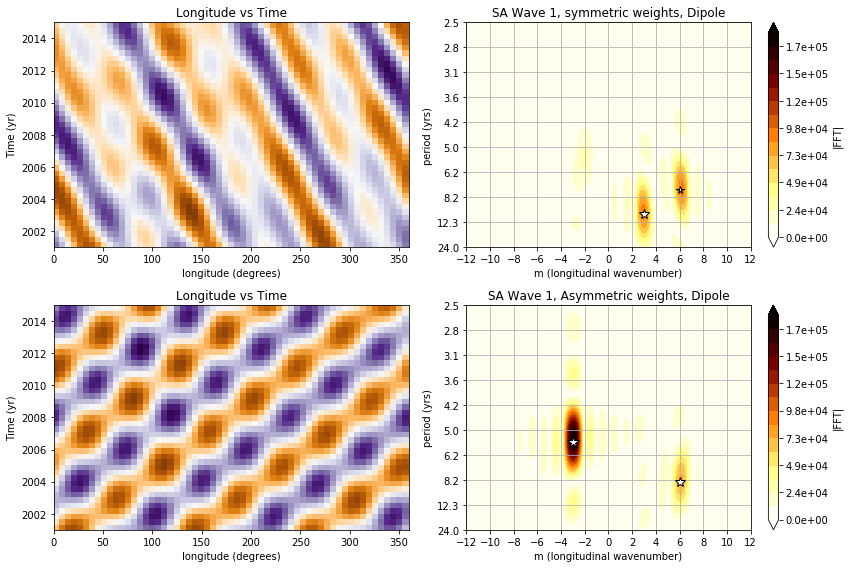

In [11]:
SAdw_eq_s = cf.analyze.weighted_mean_region_allT(SAdw, th=th, weights=weights_s)
m, freq, SAdw_pwn_s  = cf.analyze.compute_frequency_wavenumber(SAdw_eq_s, T)
SAdw_eq_a = cf.analyze.weighted_mean_region_allT(SAdw, th=th, weights=weights_a)
m, freq, SAdw_pwn_a  = cf.analyze.compute_frequency_wavenumber(SAdw_eq_a, T)

if plot_figures:
    zmax = np.max(np.vstack((np.abs(SAdw_pwn_s), np.abs(SAdw_pwn_a))))

    plt.figure(figsize=(12,8))
    plt.subplot(221)
    cf.plot.longitudetime(SAdw_eq_s,T)
    plt.subplot(222)
    cf.plot.period_wavenumber_contourf(m, freq, SAdw_pwn_s, title='SA Wave 1, symmetric weights, Dipole', vmax=zmax)
    for wp in wave_params:
        if wp[0] == 0:
            plt.plot(wp[1],1/wp[2],'w*', markersize=wp[3]*5, markeredgecolor='k')

    plt.subplot(223)
    cf.plot.longitudetime(SAdw_eq_a,T)
    plt.subplot(224)
    cf.plot.period_wavenumber_contourf(m, freq, SAdw_pwn_a, title='SA Wave 1, Asymmetric weights, Dipole', vmax=zmax)
    for wp in wave_params:
        if wp[0] == 1:
            plt.plot(wp[1],1/wp[2],'w*', markersize=wp[3]*5, markeredgecolor='k')
    plt.tight_layout()

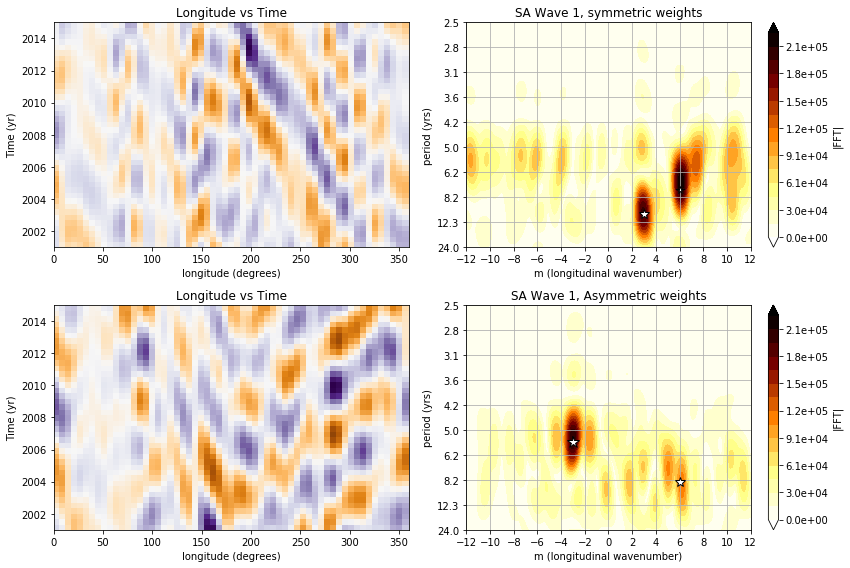

In [12]:
SAw_eq_s = cf.analyze.weighted_mean_region_allT(SAw, th=th, weights=weights_s)
m, freq, SAw_pwn_s  = cf.analyze.compute_frequency_wavenumber(SAw_eq_s, T)
SAw_eq_a = cf.analyze.weighted_mean_region_allT(SAw, th=th, weights=weights_a)
m, freq, SAw_pwn_a  = cf.analyze.compute_frequency_wavenumber(SAw_eq_a, T)

if plot_figures:
    zmax = np.max(np.vstack((np.abs(SAw_pwn_s), np.abs(SAw_pwn_a))))

    plt.figure(figsize=(12,8))
    plt.subplot(221)
    cf.plot.longitudetime(SAw_eq_s,T)
    plt.subplot(222)
    cf.plot.period_wavenumber_contourf(m, freq, SAw_pwn_s, title='SA Wave 1, symmetric weights', vmax=zmax)
    for wp in wave_params:
        if wp[0] == 0:
            plt.plot(wp[1],1/wp[2],'w*', markersize=wp[3]*5, markeredgecolor='k')

    plt.subplot(223)
    cf.plot.longitudetime(SAw_eq_a,T)
    plt.subplot(224)
    cf.plot.period_wavenumber_contourf(m, freq, SAw_pwn_a, title='SA Wave 1, Asymmetric weights', vmax=zmax)
    for wp in wave_params:
        if wp[0] == 1:
            plt.plot(wp[1],1/wp[2],'w*', markersize=wp[3]*5, markeredgecolor='k')
    plt.tight_layout()

# Correlation Analysis

### Dipole Field

In [13]:
Nphase = 20
Nperiod = 20
period_min = 3
period_max = 12
phases = np.linspace(0, 180, Nphase, endpoint=False)
periods = np.linspace(period_min, period_max, Nperiod, endpoint=False)

SASV_from_phaseperiod = wv.make_SASV_from_phaseperiod_wave_function(dat_w1, T, c012, Nth,
                                                                     B=B, dthB=dthB, dphB=dphB, 
                                                                      SV=SV, dthSV=dthSV, dphSV=dphSV)
SAdcorr, SVdcorr = cf.analyze.sweep_SASVcrosscorr(phases, periods, T, SAdw1, SVdw1, SASV_from_phaseperiod, weights=weights_s)


		finished phase 1/20

KeyboardInterrupt: 

Peak Correlation phase=117.0 degrees, period=7.50 yrs
Peak Correlation phase=117.0 degrees, period=7.50 yrs


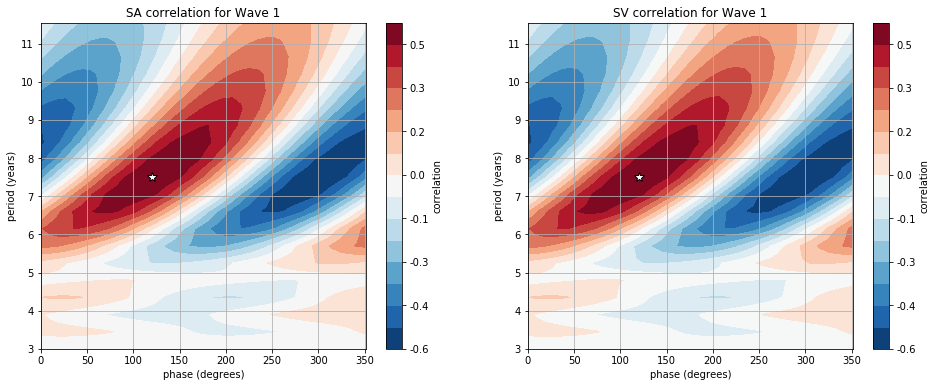

In [79]:
plt.figure(figsize=(16,6))
plt.subplot(121)
cf.plot.correlation_contourf(phases, periods, SAcorr, real_period=period_w1, real_phase=phase_w1, title='SA correlation for Wave 1, dipole field')
plt.subplot(122)
cf.plot.correlation_contourf(phases, periods, SVcorr, real_period=period_w1, real_phase=phase_w1, title='SV correlation for Wave 1, dipole field')


### Real Field

In [80]:
Nphase = 20
Nperiod = 20
period_min = 3
period_max = 12
phases = np.linspace(0, 180, Nphase, endpoint=False)
periods = np.linspace(period_min, period_max, Nperiod, endpoint=False)

SASV_from_phaseperiod = wv.make_SASV_from_phaseperiod_wave_function(l_w1, m_w1, T, delta_th_w1, c012, Nth,
                                                                     B=B, dthB=dthB, dphB=dphB, 
                                                                      SV=SV, dthSV=dthSV, dphSV=dphSV)
SAcorr, SVcorr = cf.analyze.sweep_SASVcrosscorr(phases, periods, T, SAw1, SVw1, SASV_from_phaseperiod, weights=weights_s)


		finished phase 20/20

Peak Correlation phase=117.0 degrees, period=7.50 yrs
Peak Correlation phase=117.0 degrees, period=7.50 yrs


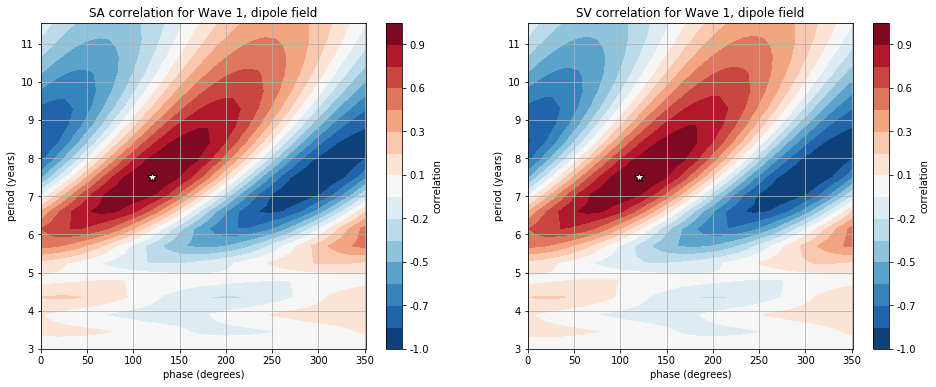

In [81]:
plt.figure(figsize=(16,6))
plt.subplot(121)
cf.plot.correlation_contourf(phases, periods, SAcorr, real_period=period_w1, real_phase=phase_w1, title='SA correlation for Wave 1, full field')
plt.subplot(122)
cf.plot.correlation_contourf(phases, periods, SVcorr, real_period=period_w1, real_phase=phase_w1, title='SV correlation for Wave 1, full field')


## Amplitude Fit

In [25]:
SAw_normalized = [SAw1/dat_w1[3], SAw2/dat_w2[3], SAw3/dat_w3[3], SAw4/dat_w4[3]]

cf.analyze.fit_amplitudes(SAw, SAw_normalized)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.85805257381e-05
            Iterations: 37
            Function evaluations: 269
            Gradient evaluations: 37


array([ 1.50000043,  2.00000036,  1.99999965,  2.50000006])

In [15]:
# Graphically demonstrate concavity

Namps = 20
amp_min = 0
amp_max = 4

SAw_normalized = [SAw1/dat_w1[3], SAw2/dat_w2[3]]

misfit = cf.analyze.sweep_amplitude_misfit(SAw1 + SAw2, SAw_normalized, amp_min=amp_min, amp_max=amp_max, Namps=Namps, weights=weights_s)

In [16]:
amp_fits, ind_fits = cf.analyze.find_best_from_swept_misfit(misfit, amp_min=amp_min, amp_max=amp_max, Namps=Namps, return_inds=True)
amp_fits

[1.4736842105263157, 1.8947368421052631]

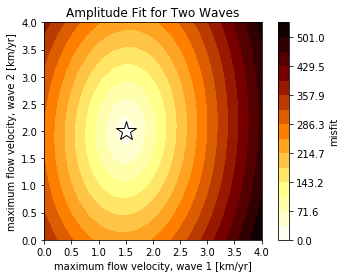

In [18]:
xlbl = 'maximum flow velocity, wave 1 [km/yr]'
ylbl = 'maximum flow velocity, wave 2 [km/yr]'
cf.plot.amplitude_fit_2waves(misfit, amp_min, amp_max, Namps, real_amp1=dat_w1[3], real_amp2=dat_w2[3], 
                             savename='amp_fit.pdf', extend='neither', newfig=True, ylbl=ylbl, xlbl=xlbl)

## New Code